# Projeto: “Pacientes Diabéticos”  

### Sobre o conjunto de dados:  

Estes dados são originários do *National Institute of Diabetes and Digestive and Kidney Diseases* e também foi utilizado o artigo de Das M, Bhattacharyya G, Gong R. [*Determinants of gestational diabetes pedigree function for pima Indian females*](https://openventio.org/wp-content/uploads/Determinants-of-Gestational-Diabetes-Pedigree-Function-for-Pima-Indian-Females-IMOJ-6-121.pdf). Intern Med Open J. 2022; 6(1): 9-13, para complementar as informações dos dados. O objetivo desses dados é prever o se pacientes do sexo feminino têm diabetes com base nos atributos coletados.  
O conjunto de dados possui as seguintes variáveis:

- Pregnancies: número de gravdiezes das pacientes. O [*CDC*](https://www.cdc.gov/diabetes/basics/risk-factors.html) informa que a diabetes gestacional é comum em mulheres com sobrepeso, mais de 25 anos e com histórico familiar de diabetes tipo 2. Normalmente após o parto corre melhora, mas pode aumentar o risco da mulher desenvolver diabetes tipo 2 no futuro;  
- Glucose: nível de glicose ou de açúcar na corrente sanguínea após o teste de tolerância a glicose. De acordo com o [*CDC*](https://www.cdc.gov/diabetes/basics/getting-tested.html),níveis entre 140 – 199 mg/dL indicam pré-diabetes e maiores que 200 mg/dL diabetes;
- BloodPressure: valores da presão diastólica, ou seja, a pressão exercida pelo sangue nas artérias entre os batimentos cardíacos. A diabetes é um [fator de risco](https://www.cdc.gov/bloodpressure/about.htm#whatdo) comum para hipertensão arterial, e valores maiores de 80mmHg indicam que o indivíduo podeá desenvolver a doença;
- SkinThickness: medida da grossura da dobradura de pele do tríceps. Pacientes diabéticos tendem a ter uma [pele mais fina](https://www.researchgate.net/publication/343920970_Skin_Thickness_can_Predict_the_Progress_of_Diabetes_Type_2_A_New_Medical_Hypothesis) do que indivíduos sem a doença;
- Insulin: níveis séricos de insulina na corrente sanguínea 2h após a ingestão de glicose. [Normalmente](https://www.cdc.gov/diabetes/basics/insulin-resistance.html), os níveis de insulina e glicose trabalham juntos regulando o açúcar na corrente sanguínea. Quando os níveis de glicose no sangue estão altos, o pâncreas libera insulina para auxiliar na absorção celular. Na diabetes tipo 2, as células se tornam resistentes a insulina e não conseguem absorver o açúcar do sangue, levando o pâncreas a liberar cada vez mais mais insulina, que se acumula no sangue com a glicose. Já na diabetes tipo 1, o pâncreas não produz insulina suficiente, levando ao acúmulo de glicose na corrente sanguínea;
- BMI: ou Índice de Massa Corporal, é calculado com base na altura e peso dos indivíduos. De acordo com o [*CDC*](https://www.cdc.gov/diabetes/library/features/diabetes-causes.html#:~:text=Your%20Body%20Mass%20Index%20Matters&text=Most%20health%20professionals%20rely%20on,tested%20for%20type%202%20diabetes.), auxilia na classificação dos pacientes quando ao sobrepeso (maior que 25) ou obesidade (maior que 30). O sobrepeso é um fator de risco importante a diabetes tipo 2;
- DiabetesPedigreeFunction: [estima](https://openventio.org/wp-content/uploads/Determinants-of-Gestational-Diabetes-Pedigree-Function-for-Pima-Indian-Females-IMOJ-6-121.pdf), com base na idade e histórico familiar de um indiíduo, as chances desse desenvolver diabetes;
- Age: em anos, variando entre 21 e 81;
- Outcome: se a paciente tem ou não diabetes.

### Análise:  


##### Importações

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('diabetes.csv', sep=',')
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##### Verificando os dados

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


O conjunto de dados tem 9 colunas e 768 entradas não nulas.

In [52]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [53]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Incluimos a coluna 'Diagnosis' para descrever os dados da coluna 'Outcome'.

In [54]:
def diabetes(number):
    if number == 0:
        return 'Não-diabetes'
    else:
        return 'Diabetes'


data['Diagnosis']=data['Outcome'].apply(diabetes)

In [55]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Diagnosis
0,6,148,72,35,0,33.6,0.627,50,1,Diabetes
1,1,85,66,29,0,26.6,0.351,31,0,Não-diabetes
2,8,183,64,0,0,23.3,0.672,32,1,Diabetes
3,1,89,66,23,94,28.1,0.167,21,0,Não-diabetes
4,0,137,40,35,168,43.1,2.288,33,1,Diabetes


##### Visualizações

Inicialmente, analisamos a correlação entre as variáveis e o resultado (Outcome) para identificar aquelas que influenciavam no diagnóstico da diabetes.

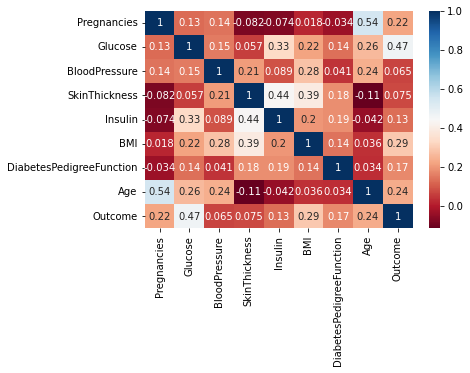

In [95]:
corr = data.corr()
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns,
           annot=True, cmap='RdBu');

Focaremos a análise nas seguintes variáveis: *Pregnancies*, *Glucose*, *Insulin* , *BMI*, e *Age*.  


Primeiramente, vamos verificar a relação entre *Age* e *Outcome*.

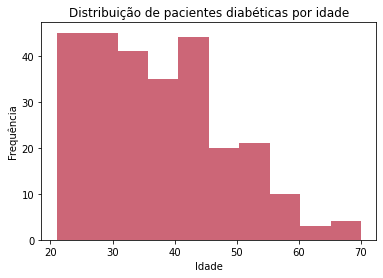

In [85]:
plt.hist(data[data['Outcome']==1]['Age'], bins=10, color='#CC6677')
plt.title('Distribuição de pacientes diabéticas por idade');
plt.xlabel('Idade');
plt.ylabel('Frequência');
plt.show();

A maioria das mulheres diabéticas se encontram na faixa etária de 21 e 30 anos, mas há um outro pico de pacientes na idade de 45 anos, o que [pode indicar](https://www.cdc.gov/diabetes/basics/risk-factors.html) possíveis diagnósticos de pré-diabetes e/ou diabetes tipo 2.  
Casos de diabetes são mais frequentes entre as mulheres que reportaram maior número de gravidezes, como podemos ver abaixo.  



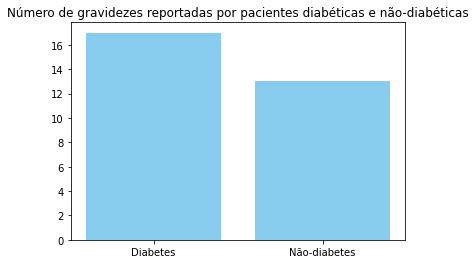

In [92]:
plt.bar(data['Diagnosis'], data['Pregnancies'], color='#88CCEE')
plt.title('Número de gravidezes reportadas por pacientes diabéticas e não-diabéticas');
plt.show();

Mulheres que relataram nenhuma a 3 gravidezes foram as que mais tiveram níveis de glicose maiores de 140 mg/dl, como vemos no histograma abaixo.

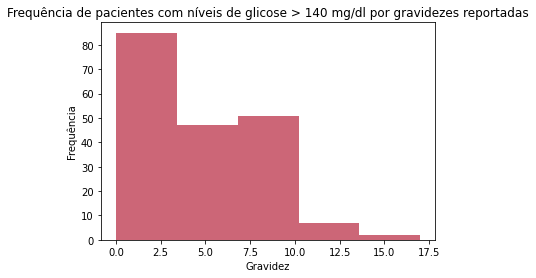

In [87]:
plt.hist(data[data['Glucose']>140]['Pregnancies'], bins=5, color='#CC6677')
plt.title('Frequência de pacientes com níveis de glicose > 140 mg/dl por gravidezes reportadas');
plt.xlabel('Gravidez');
plt.ylabel('Frequência');
plt.show()

Os dados também mostram que as mulheres com IMC maior que 30 foram as queapresentaram níveis de glicose maiores de 140 mg/dl com mais frequência.

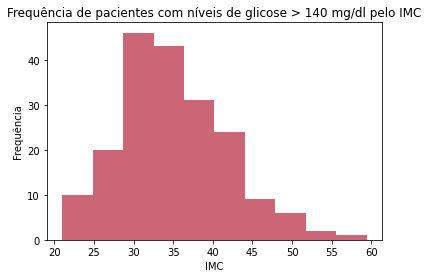

In [88]:
plt.hist(data[data['Glucose']>140]['BMI'], bins=10, color='#CC6677')
plt.title('Frequência de pacientes com níveis de glicose > 140 mg/dl pelo IMC');
plt.xlabel('IMC');
plt.ylabel('Frequência');
plt.show();

Vemos com os dados que, quando os níveis de glicose no sangue aumentam, também há aumento nos níveis de insulina. Mas, temos um pico de insulina de 800 µU/ml, enquanto o pico de glicose sanguínea foi de 199 mg/dL. Este achado sugere a possibilidade de uma condição chamada [*hiperinsulinemia*](https://my.clevelandclinic.org/health/diseases/24178-hyperinsulinemia), que está associada a resistência celular à insulina, podendo evoluir para o diabetes tipo 2.

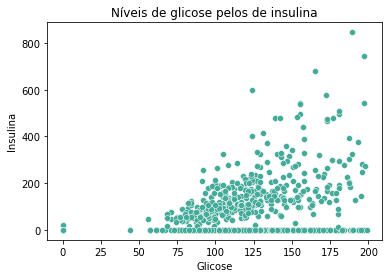

In [91]:
sns.scatterplot(x=data['Glucose'], y=data['Insulin'], color='#44AA99')
plt.title('Níveis de glicose pelos de insulina');
plt.xlabel('Glicose');
plt.ylabel('Insulina');
plt.show();

Mulheres diabéticas também estavam sujeitas a maiores níveis séricos de insulina no sangue.

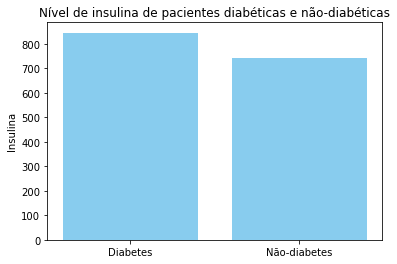

In [93]:
plt.bar(data['Diagnosis'], data['Insulin'],color='#88CCEE')
plt.title('Nível de insulina de pacientes diabéticas e não-diabéticas');
plt.ylabel('Insulina');
plt.show()

##### Predições

O método de Classificador de Vetor de Suporte Linear ou [Linear Support Vector Classifier (SVC)](https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python) é uma função kernel linear que pode ser utilizada para classificar amostras.  
Cremos que será adequada para predizer as chances das pacientes de receberem o diagnóstico de diabetes.

In [63]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [64]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Diagnosis
0,6,148,72,35,0,33.6,0.627,50,1,Diabetes
1,1,85,66,29,0,26.6,0.351,31,0,Não-diabetes
2,8,183,64,0,0,23.3,0.672,32,1,Diabetes
3,1,89,66,23,94,28.1,0.167,21,0,Não-diabetes
4,0,137,40,35,168,43.1,2.288,33,1,Diabetes


Iremos crias subconjuntos dos dados com as variáveis *Pregnancies*, *Glucose*, *Insulin* , *BMI*, e *Age* e outro subconjunto com a variável *Outcome*

In [65]:
x = data[['Pregnancies','Glucose','BMI','Age', 'Insulin']]
x.head()

,Pregnancies,Glucose,BMI,Age,Insulin
0,6,148,33.6,50,0
1,1,85,26.6,31,0
2,8,183,23.3,32,0
3,1,89,28.1,21,94
4,0,137,43.1,33,168


In [66]:
y = data['Outcome']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

Dividiremos os subconjuntos entre grupos de treino, com 75% dos dados, e de teste com 25% dos dados.

In [67]:
SEED = 20
np.random.seed(SEED)

train_x, test_x, train_y, test_y = train_test_split(x,y, random_state = SEED, test_size = 0.25, stratify = y)

In [68]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape,'\n')
print('******\n')
print('Treinando com %d elementos e testando com %d elementos.' % (len(train_x), len(test_x)))

(576, 5)
(576,)
(192, 5)
(192,) 

******

Treinando com 576 elementos e testando com 192 elementos.


Agora o modelo será treinado e poderá prever os diagnósticos.  
Por útlimo, teremos a estimativa do quão acurado o classificador é para prever a diabetes.

In [69]:
model = LinearSVC(dual=False)
model.fit(train_x, train_y)

predict = model.predict(test_x)

accuracy = accuracy_score(test_y, predict)*100

print('Acurácia de of %.2f%%' % accuracy)

Acurácia de of 80.21%
